# Tema 6: Numerisk integrasjon


Repetisjon (programmeringspuslespill):

[Rektangelmetoden](http://parsons.problemsolving.io/puzzle/e6f9400da6d54c1389d6a1f7489eca36)

[Diskret derivasjon](http://parsons.problemsolving.io/puzzle/cd36da48d9cc4fcbbaf13103d84454bf)

[Halveringsmetoden](http://parsons.problemsolving.io/puzzle/267d396f643145f6891e3965b75b93b2)

## Rektangelmetoden

In [5]:
n = 100000

def f(x):
    return x**4

def f_analytisk(x):
    return (1/5)*x**5

def rektangelmetoden_venstre(f, a, b, n):
    A = 0
    h = (b-a)/n
    for i in range(n):
        A = A + f(a+i*h)
    return A*h

print(f'Numerisk verdi: {rektangelmetoden_venstre(f,0,2,n)}')
print(f'Analytisk verdi: {f_analytisk(2)-f_analytisk(0)}')

Numerisk verdi: 6.399840001066687
Analytisk verdi: 6.4


## Bruk av biblioteker

In [6]:
from scipy import integrate
import numpy as np

x = np.linspace(0,2,n)
y = f(x)

trapes = integrate.trapz(y,x)
simpsons = integrate.simps(y,x)
print(trapes)
print(simpsons)

6.4000000010666875
6.400000000000016


## Tilfeldige tall

In [7]:
import numpy as np
N = 1000000
seksere = 0

for i in range(N):
    kast = np.random.randint(1,7)
    if kast == 6:
        seksere += 1
        
relfrek = seksere/N
print(relfrek)
print(1/6)

0.167036
0.16666666666666666


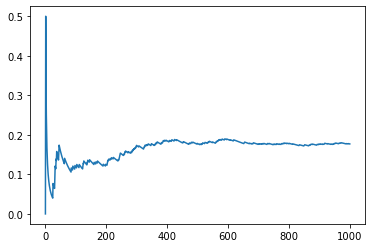

In [8]:
import matplotlib.pyplot as plt

N = 1000
antall_seksere = 0
relativ_frekvens = []
antall_kast = []

for i in range(1,N+1):
    kast = np.random.randint(1,7)
    if kast == 6:
        antall_seksere += 1
    relfrek = antall_seksere/i
    relativ_frekvens.append(relfrek)
    antall_kast.append(i)

plt.plot(antall_kast,relativ_frekvens)
plt.show()

## Monte Carlo-integrasjon

In [9]:
# Vi skal finne pi
import numpy as np

N = 1000000
M = 0

for i in range(N):
    x = np.random.uniform(-1,1)
    y = np.random.uniform(-1,1)
    if x**2 + y**2 <= 1:
        M += 1
A = 4*M/N
print(A)

3.144164


In [10]:
def montecarlo(f,a,b,n):
    h = (b-a)/n
    x = np.random.uniform(a,b,n)
    y = f(x)
    fsum = np.sum(y)
    integral = h*fsum
    return integral

def f(x):
    return x**4

def f_analytisk(x):
    return (1/5)*x**5

print(f'Numerisk verdi: {montecarlo(f,0,2,1000)}')
print(f'Analytisk verdi: {f_analytisk(2)-f_analytisk(0)}')

Numerisk verdi: 6.658632580247065
Analytisk verdi: 6.4


## Heistur, sesong 2

In [11]:
import numpy as np

data = np.loadtxt('Datafiler-innhold/heistur.csv',delimiter=',',skiprows=1)

tid = data[:,3]
v = data[:,4]
integral = 0

for i in range(len(v)-2):
    bredde = tid[i+1] - tid[i]
    dy = abs(v[i+1])
    integral += dy*bredde
    
print(integral)

15.806602796813385


## Numeriske biblioteker: Integrasjon

## Numeriske biblioteker: Multippel integrasjon

$$\int_0^{\frac{\pi}{2}} \int_{-1}^1 x \sin(y) - ye^x dxdy$$
$$\int_0^3 \int_0^2 \int_0^1 xyz dxdydz$$

In [ ]:
analytisk_dobbel = np.pi**2/8 * (1/np.exp(1) - np.exp(1))
analytisk_trippel = 9/2